# Lead Scoring Case Study


### Step 1: importing the packages and dataset

In [180]:
# importing the packages
import pandas as pd, numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [181]:
# importing the dataset
Lead_data = pd.read_csv("Leads.csv")
Lead_data.head()   #viewing the 5 top rows of the dataframe

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 2: Some insights of the data

In [182]:
Lead_data.shape
# so there are total of 9740 rows and 37 ccolumns which we have to work on

(9240, 37)

In [183]:
# statistic insight of the data
Lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [184]:
Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Step 3: Cleaning the data (data preparation)

In [185]:
# converting the binary variables(yes/no) to 0/1

var_list= ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview' ]

def binary_map(i):
    return i.map({ 'Yes': 1, 'No': 0 })

Lead_data[var_list]= Lead_data[var_list].apply(binary_map)
Lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [186]:
Lead_data['Asymmetrique Profile Score'].astype('category').value_counts()

15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: Asymmetrique Profile Score, dtype: int64

In [187]:
# creating dummy variables

dummy1= pd.get_dummies(Lead_data[['What is your current occupation']], drop_first=True)
Lead_data= pd.concat([Lead_data, dummy1], axis=1)
Lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,15.0,15.0,0,0,Modified,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,15.0,15.0,0,0,Email Opened,0,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,14.0,20.0,0,1,Email Opened,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,13.0,17.0,0,0,Modified,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,15.0,18.0,0,0,Modified,0,0,0,1,0


In [188]:
Lead_data = Lead_data.drop('What is your current occupation', axis=1)
Lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,15.0,15.0,0,0,Modified,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,15.0,15.0,0,0,Email Opened,0,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,14.0,20.0,0,1,Email Opened,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,13.0,17.0,0,0,Modified,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,15.0,18.0,0,0,Modified,0,0,0,1,0


In [189]:
Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 41 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Prospect ID                                           9240 non-null   object 
 1   Lead Number                                           9240 non-null   int64  
 2   Lead Origin                                           9240 non-null   object 
 3   Lead Source                                           9204 non-null   object 
 4   Do Not Email                                          9240 non-null   int64  
 5   Do Not Call                                           9240 non-null   int64  
 6   Converted                                             9240 non-null   int64  
 7   TotalVisits                                           9103 non-null   float64
 8   Total Time Spent on Website                           9240

In [190]:
# handling the "select" in many categorical variables
# from the data dictionary, we can see that 'select' is when a customer didn't choose anything from the list, so it is as good as null.
# So, we need to convert them to null values.

Lead_data = Lead_data.replace('Select', np.nan)


In [191]:
# now we need to check for all missing values/percentages in the dataframe

round(Lead_data.isnull().sum()/len(Lead_data.index), 2) * 100

Prospect ID                                              0.0
Lead Number                                              0.0
Lead Origin                                              0.0
Lead Source                                              0.0
Do Not Email                                             0.0
Do Not Call                                              0.0
Converted                                                0.0
TotalVisits                                              1.0
Total Time Spent on Website                              0.0
Page Views Per Visit                                     1.0
Last Activity                                            1.0
Country                                                 27.0
Specialization                                          37.0
How did you hear about X Education                      78.0
What matters most to you in choosing a course           29.0
Search                                                   0.0
Magazine                

In [192]:
# now theoretically, 25 to 30% missing values can be considered for imputation, but beyond 40, the column should be dropped
Lead_data= Lead_data.drop(columns=['How did you hear about X Education', 'Lead Profile','Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'])

In [193]:
round(Lead_data.isnull().sum()/len(Lead_data.index), 2) * 100

Prospect ID                                              0.0
Lead Number                                              0.0
Lead Origin                                              0.0
Lead Source                                              0.0
Do Not Email                                             0.0
Do Not Call                                              0.0
Converted                                                0.0
TotalVisits                                              1.0
Total Time Spent on Website                              0.0
Page Views Per Visit                                     1.0
Last Activity                                            1.0
Country                                                 27.0
Specialization                                          37.0
What matters most to you in choosing a course           29.0
Search                                                   0.0
Magazine                                                 0.0
Newspaper Article       

### Step 4: Analysing the variables

C:\Users\sanje\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


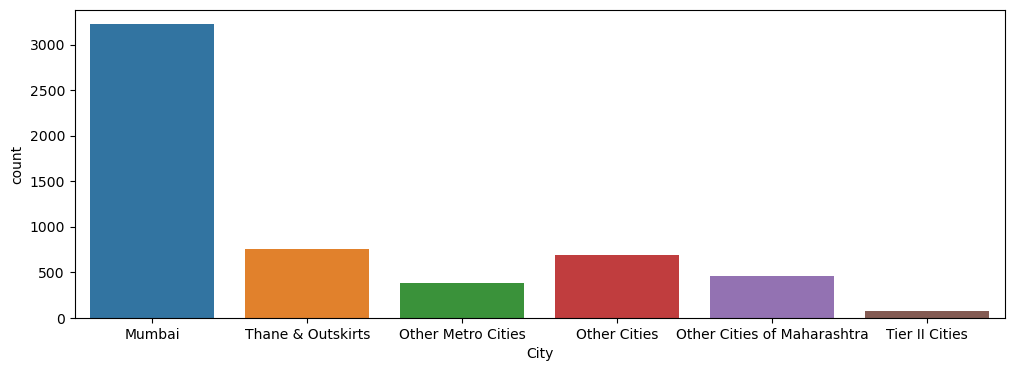

In [194]:
# now analysing the remaining columns individually

# 1- City with 40% missing values
plt.figure(figsize=(12,4))
sns.countplot(Lead_data['City'])
plt.show()

In [195]:
# since Mumbai as the most values, we can impute the missing values with this
Lead_data["City"]= Lead_data['City'].replace(np.nan, 'Mumbai')

In [196]:
round(Lead_data.isnull().sum()/len(Lead_data.index), 2) * 100

Prospect ID                                              0.0
Lead Number                                              0.0
Lead Origin                                              0.0
Lead Source                                              0.0
Do Not Email                                             0.0
Do Not Call                                              0.0
Converted                                                0.0
TotalVisits                                              1.0
Total Time Spent on Website                              0.0
Page Views Per Visit                                     1.0
Last Activity                                            1.0
Country                                                 27.0
Specialization                                          37.0
What matters most to you in choosing a course           29.0
Search                                                   0.0
Magazine                                                 0.0
Newspaper Article       

C:\Users\sanje\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


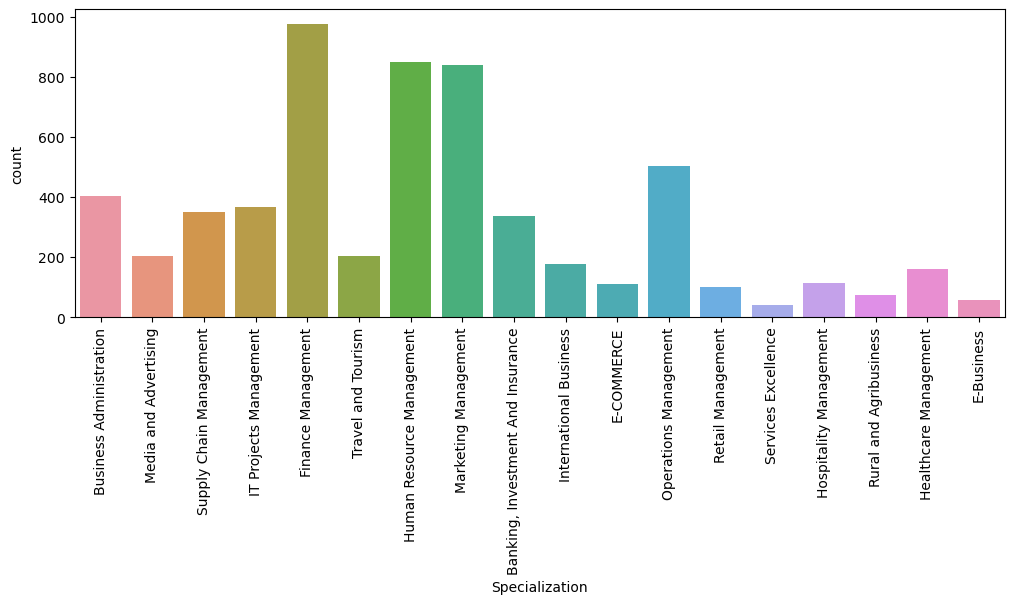

In [197]:
# 2- Specialization with 37% missing values

plt.figure(figsize=(12,4))
sns.countplot(Lead_data['Specialization'])
plt.xticks(rotation=90)
plt.show()

In [198]:
# from the graph we can infer that the missing 37% values may have come from when the customer has different specialization than mentioned in the already list,
# to fix this we can create another category "others" for the missing values

Lead_data['Specialization']= Lead_data['Specialization'].replace(np.nan, 'Others')

In [199]:
round(Lead_data.isnull().sum()/len(Lead_data.index), 2) * 100

Prospect ID                                              0.0
Lead Number                                              0.0
Lead Origin                                              0.0
Lead Source                                              0.0
Do Not Email                                             0.0
Do Not Call                                              0.0
Converted                                                0.0
TotalVisits                                              1.0
Total Time Spent on Website                              0.0
Page Views Per Visit                                     1.0
Last Activity                                            1.0
Country                                                 27.0
Specialization                                           0.0
What matters most to you in choosing a course           29.0
Search                                                   0.0
Magazine                                                 0.0
Newspaper Article       

C:\Users\sanje\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


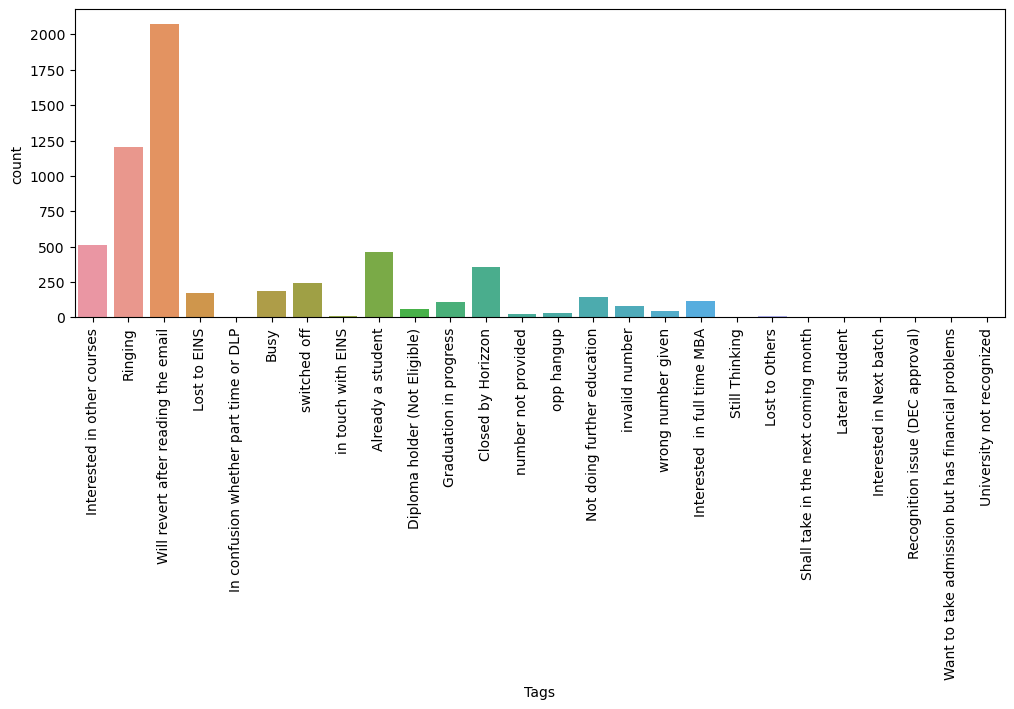

In [200]:
# next up we have 
# 3- Tags with 36% missing values

plt.figure(figsize=(12,4))
sns.countplot(Lead_data['Tags'])
plt.xticks(rotation=90)
plt.show()

In [201]:
# from the graph we can see one category has the most values, we can use this to replace missing values

Lead_data['Tags']= Lead_data['Tags'].replace(np.nan, 'Will revert after reading the email')

In [202]:
round(Lead_data.isnull().sum()/len(Lead_data.index), 2) * 100

Prospect ID                                              0.0
Lead Number                                              0.0
Lead Origin                                              0.0
Lead Source                                              0.0
Do Not Email                                             0.0
Do Not Call                                              0.0
Converted                                                0.0
TotalVisits                                              1.0
Total Time Spent on Website                              0.0
Page Views Per Visit                                     1.0
Last Activity                                            1.0
Country                                                 27.0
Specialization                                           0.0
What matters most to you in choosing a course           29.0
Search                                                   0.0
Magazine                                                 0.0
Newspaper Article       

C:\Users\sanje\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


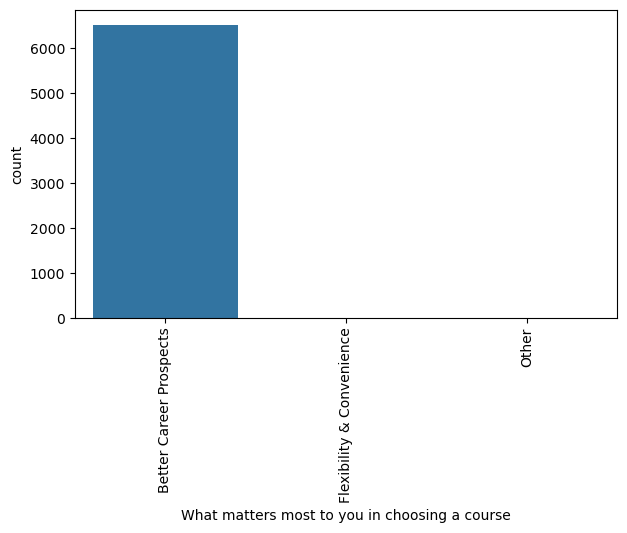

In [203]:
# now, we are left with only two columns
# 4- "What matters most to you in choosing a course" with 29% missing values

plt.figure(figsize=(7,4))
sns.countplot(Lead_data['What matters most to you in choosing a course'])
plt.xticks(rotation=90)
plt.show()

In [204]:
# the graph is not clear about the other category values that is how much is the value,
# for that we need to see it in percentage view

round(Lead_data['What matters most to you in choosing a course'].value_counts(normalize=True), 2) * 100

Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: What matters most to you in choosing a course, dtype: float64

In [205]:
# we can see that other 2 categories have no value, so this is a highly skewed column
# we need to drop this column because this will not infer any good statistical insights

Lead_data= Lead_data.drop('What matters most to you in choosing a course', axis=1)

In [206]:
round(Lead_data.isnull().sum()/len(Lead_data.index), 2) * 100

Prospect ID                                              0.0
Lead Number                                              0.0
Lead Origin                                              0.0
Lead Source                                              0.0
Do Not Email                                             0.0
Do Not Call                                              0.0
Converted                                                0.0
TotalVisits                                              1.0
Total Time Spent on Website                              0.0
Page Views Per Visit                                     1.0
Last Activity                                            1.0
Country                                                 27.0
Specialization                                           0.0
Search                                                   0.0
Magazine                                                 0.0
Newspaper Article                                        0.0
X Education Forums      

C:\Users\sanje\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


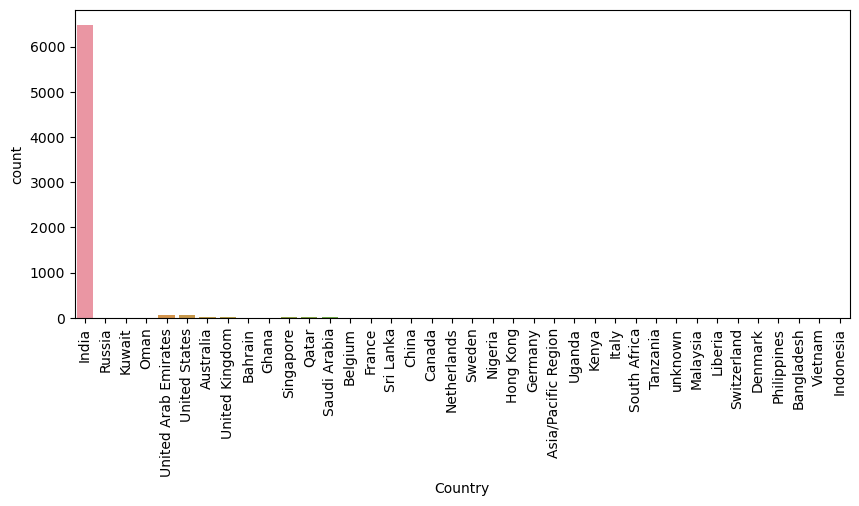

In [207]:
# we are left with one column now
# 5- Country with 27% missing values

plt.figure(figsize=(10,4))
sns.countplot(Lead_data['Country'])
plt.xticks(rotation=90)
plt.show()

In [208]:
# since most values are India, we can impute missin values with this

Lead_data['Country']=Lead_data['Country'].replace(np.nan, 'India')

In [209]:
# Rest missing values are 1%, so we can drop the rows

Lead_data.dropna(inplace=True)

In [210]:
round(Lead_data.isnull().sum()/len(Lead_data.index), 2) * 100

Prospect ID                                             0.0
Lead Number                                             0.0
Lead Origin                                             0.0
Lead Source                                             0.0
Do Not Email                                            0.0
Do Not Call                                             0.0
Converted                                               0.0
TotalVisits                                             0.0
Total Time Spent on Website                             0.0
Page Views Per Visit                                    0.0
Last Activity                                           0.0
Country                                                 0.0
Specialization                                          0.0
Search                                                  0.0
Magazine                                                0.0
Newspaper Article                                       0.0
X Education Forums                      

In [211]:
# now , we are clear with the missing values
Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 33 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Prospect ID                                           9074 non-null   object 
 1   Lead Number                                           9074 non-null   int64  
 2   Lead Origin                                           9074 non-null   object 
 3   Lead Source                                           9074 non-null   object 
 4   Do Not Email                                          9074 non-null   int64  
 5   Do Not Call                                           9074 non-null   int64  
 6   Converted                                             9074 non-null   int64  
 7   TotalVisits                                           9074 non-null   float64
 8   Total Time Spent on Website                           9074

(array([0, 1, 2, 3]),
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import')])

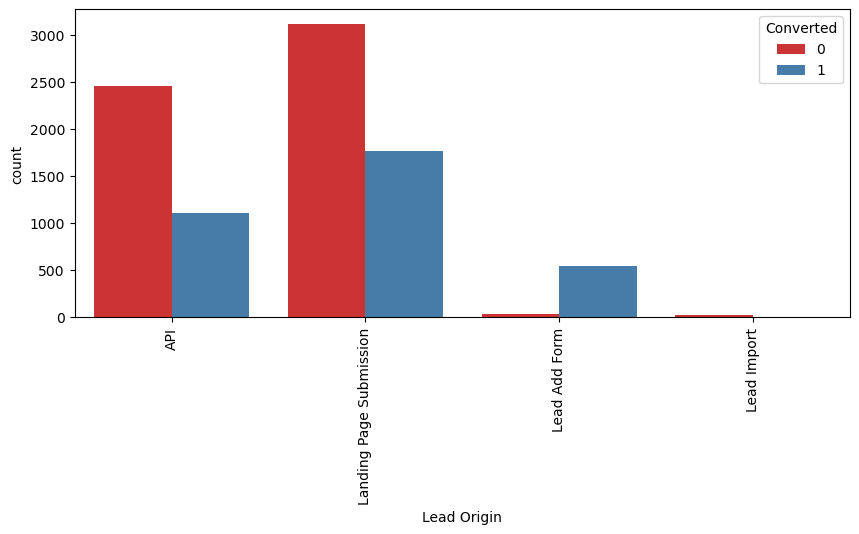

In [212]:
# checking the target variable "Converted " with the other independent variables for useful insights
# 1- Lead origin independent variable

plt.figure(figsize=(10,4))
sns.countplot(x = "Lead Origin", hue = "Converted", data = Lead_data, palette='Set1')
plt.xticks(rotation = 90)


In [213]:
# from the above graph, we can infer that 
# API and Landing Page Submission less conversion rate but count of lead from them are considerable.
# Lead Add Form has more than 90% conversion rate but count of lead are not very high.
# To improve overall lead conversion rate, 
# we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'google'),
  Text(7, 0, 'Welingak Website'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'blog'),
  Text(10, 0, 'Pay per Click Ads'),
  Text(11, 0, 'bing'),
  Text(12, 0, 'Social Media'),
  Text(13, 0, 'WeLearn'),
  Text(14, 0, 'Click2call'),
  Text(15, 0, 'Live Chat'),
  Text(16, 0, 'welearnblog_Home'),
  Text(17, 0, 'youtubechannel'),
  Text(18, 0, 'testone'),
  Text(19, 0, 'Press_Release'),
  Text(20, 0, 'NC_EDM')])

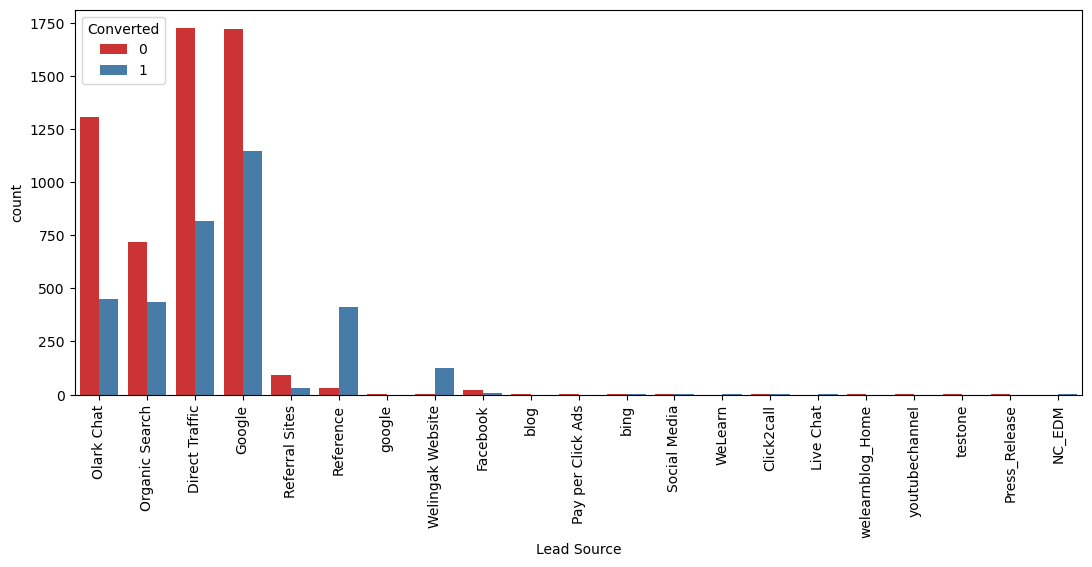

In [214]:
# 2- Lead Source independent variable

plt.figure(figsize=(13,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = Lead_data, palette='Set1')
plt.xticks(rotation = 90)

In [215]:
# we can see here, there are two cateories 'google' and 'Google', that we dont need, so we will replace it
Lead_data['Lead Source'] = Lead_data['Lead Source'].replace(['google'], 'Google')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'blog'),
  Text(9, 0, 'Pay per Click Ads'),
  Text(10, 0, 'bing'),
  Text(11, 0, 'Social Media'),
  Text(12, 0, 'WeLearn'),
  Text(13, 0, 'Click2call'),
  Text(14, 0, 'Live Chat'),
  Text(15, 0, 'welearnblog_Home'),
  Text(16, 0, 'youtubechannel'),
  Text(17, 0, 'testone'),
  Text(18, 0, 'Press_Release'),
  Text(19, 0, 'NC_EDM')])

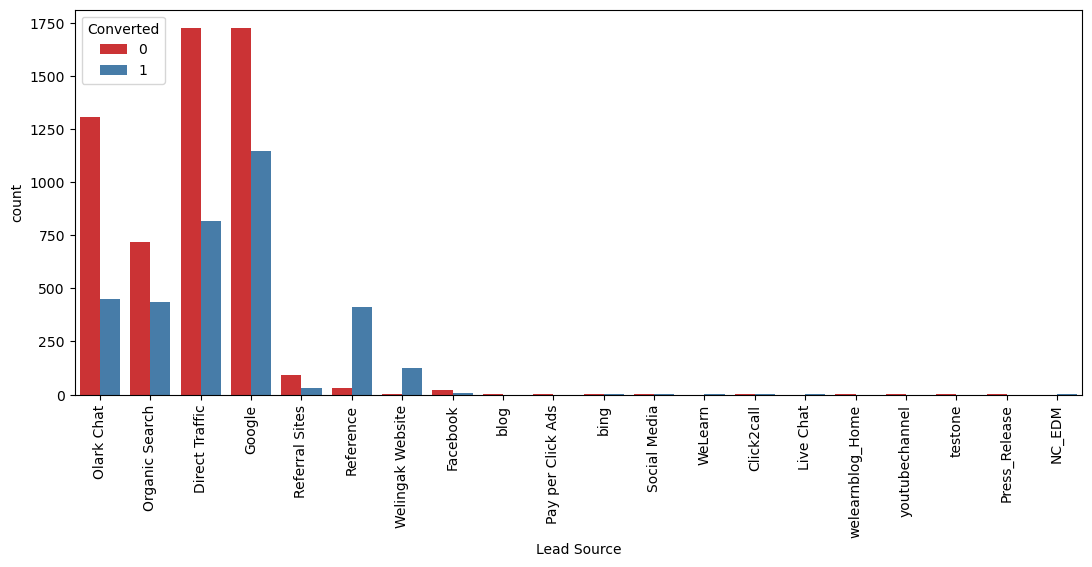

In [216]:
plt.figure(figsize=(13,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = Lead_data, palette='Set1')
plt.xticks(rotation = 90)

In [217]:
# also, we need to create another cateory others for all remaining variables having very less values

Lead_data['Lead Source'] = Lead_data['Lead Source'].replace([ 'blog','Pay per Click Ads','bing','Social Media','WeLearn','Click2call', 'Live Chat','welearnblog_Home', 'youtubechannel', 'testone','Press_Release', 'NC_EDM'], 'Others')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'Others')])

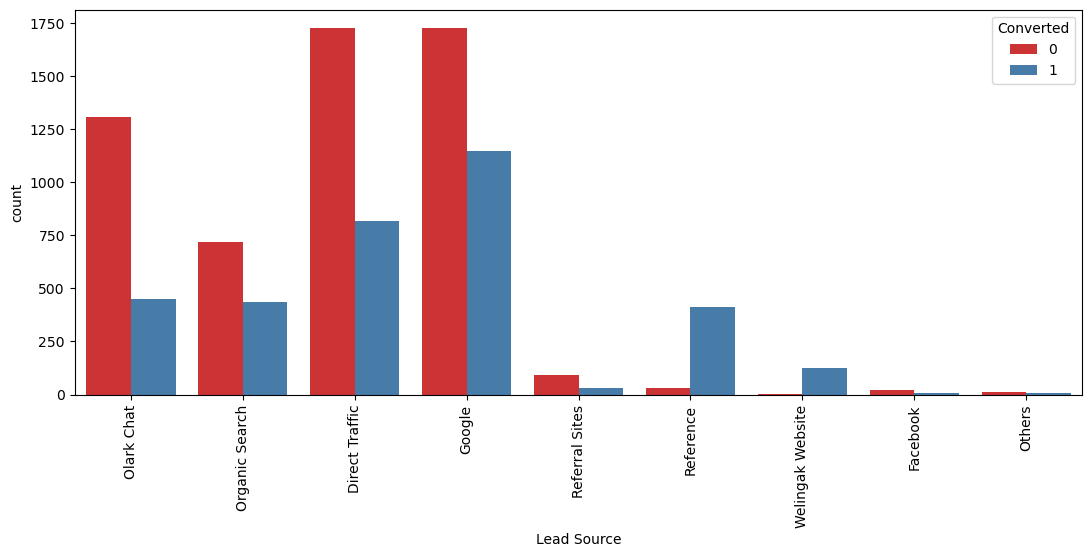

In [218]:
plt.figure(figsize=(13,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = Lead_data, palette='Set1')
plt.xticks(rotation = 90)

In [219]:
# now from the graph, we can infer :
# Google and Direct traffic generates maximum number of leads.
# Conversion Rate of reference leads and leads through welingak website is high.

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

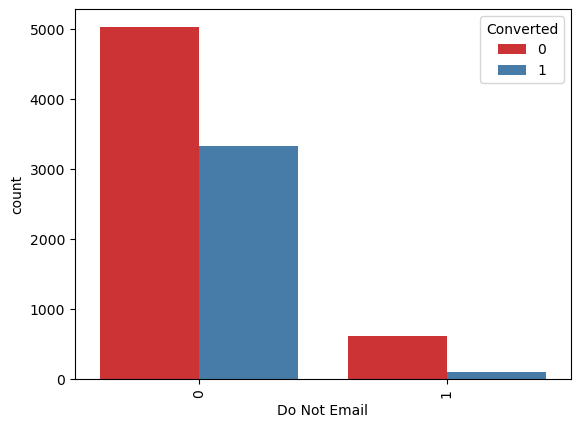

In [220]:
# 3- Do not email independent variable

sns.countplot(x = "Do Not Email", hue = "Converted", data = Lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [221]:
# since maximum of the values are no, no inference can be made

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

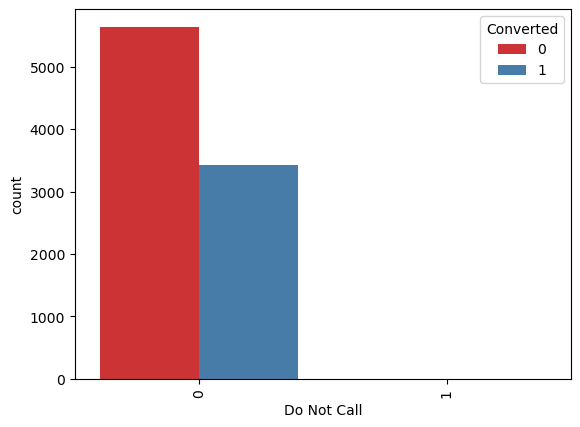

In [222]:
# 4- Do not call independent variable

sns.countplot(x = "Do Not Call", hue = "Converted", data = Lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [223]:
# same for this variable also, no inference can be made

In [224]:
# 5- Total visits independent variable

Lead_data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

C:\Users\sanje\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalVisits'>

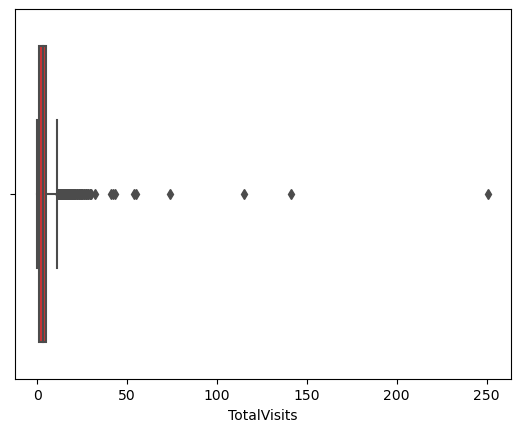

In [225]:
sns.boxplot(Lead_data['TotalVisits'], palette='Set1')

In [226]:
# from the boxplot above, we can see so many outliers, we need to cap them to 95% for analysis

perc = Lead_data['TotalVisits'].quantile([0.05,0.95]).values
Lead_data['TotalVisits'][Lead_data['TotalVisits'] <= perc[0]] = perc[0]
Lead_data['TotalVisits'][Lead_data['TotalVisits'] >= perc[1]] = perc[1]

C:\Users\sanje\AppData\Local\Temp\ipykernel_12056\64458478.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Lead_data['TotalVisits'][Lead_data['TotalVisits'] <= perc[0]] = perc[0]
C:\Users\sanje\AppData\Local\Temp\ipykernel_12056\64458478.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Lead_data['TotalVisits'][Lead_data['TotalVisits'] >= perc[1]] = perc[1]


C:\Users\sanje\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Page Views Per Visit'>

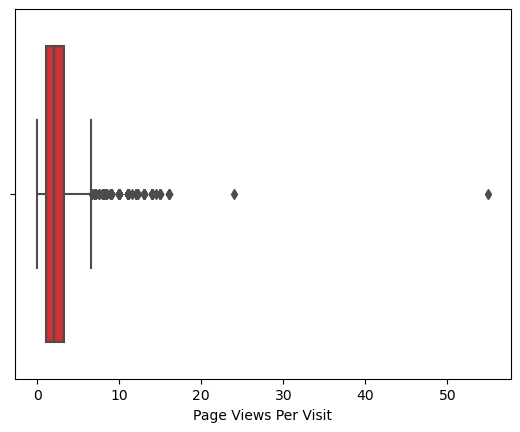

In [227]:
# 6- Page Views Per Visit independent variable

sns.boxplot(Lead_data['Page Views Per Visit'],palette='Set1')

In [228]:
# Here also we are seeing so many outliers, we need to cap this time too

perc = Lead_data['Page Views Per Visit'].quantile([0.05,0.95]).values
Lead_data['Page Views Per Visit'][Lead_data['Page Views Per Visit'] <= perc[0]] = perc[0]
Lead_data['Page Views Per Visit'][Lead_data['Page Views Per Visit'] >= perc[1]] = perc[1]

C:\Users\sanje\AppData\Local\Temp\ipykernel_12056\2525795218.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Lead_data['Page Views Per Visit'][Lead_data['Page Views Per Visit'] <= perc[0]] = perc[0]
C:\Users\sanje\AppData\Local\Temp\ipykernel_12056\2525795218.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Lead_data['Page Views Per Visit'][Lead_data['Page Views Per Visit'] >= perc[1]] = perc[1]


<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

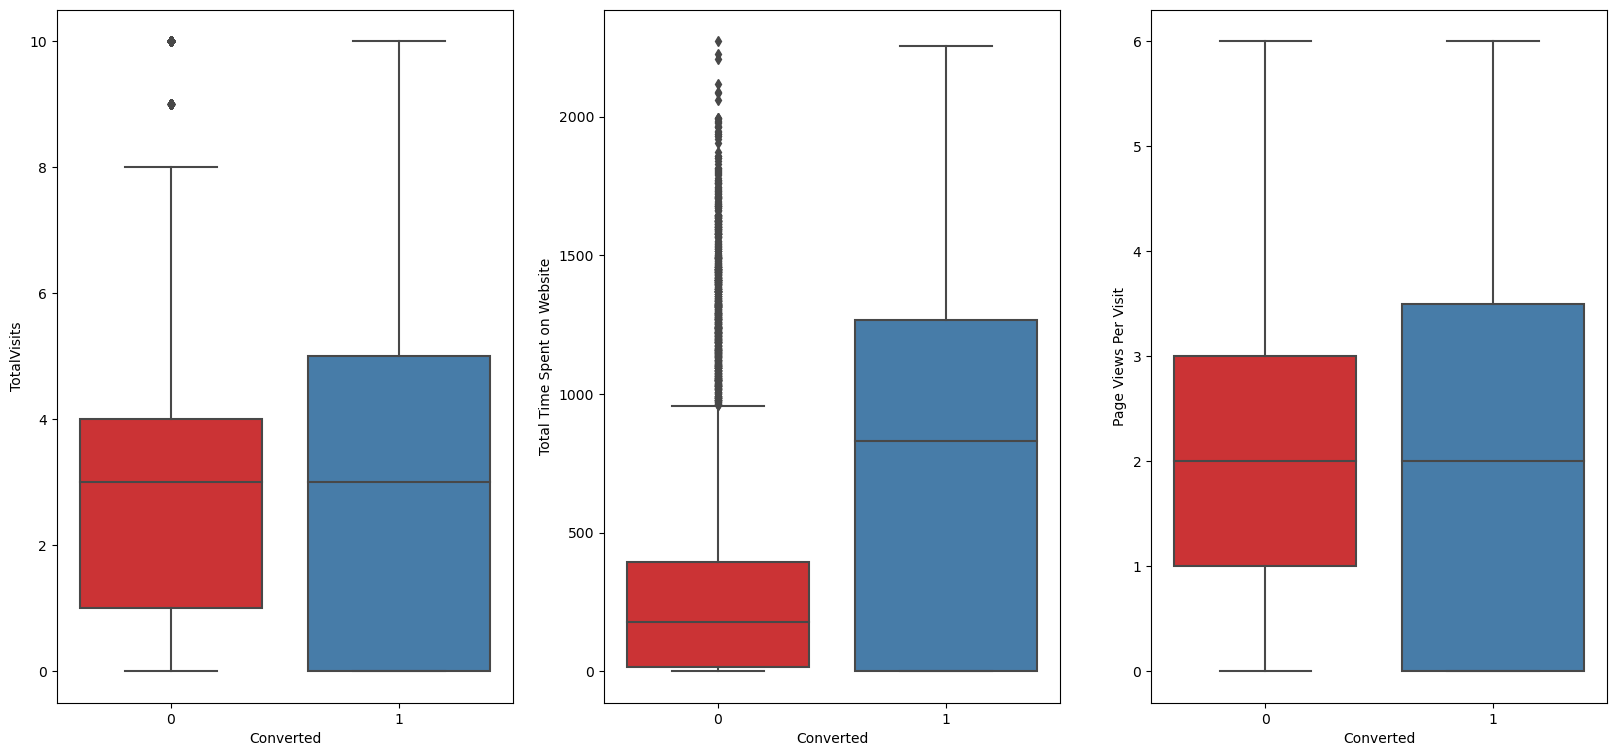

In [229]:
plt.figure(figsize=(20,9))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = Lead_data, palette='Set1')

plt.subplot(1,3,2)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = Lead_data, palette='Set1')

plt.subplot(1,3,3)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = Lead_data, palette='Set1')

In [230]:
# for TotalVisits, we can see the median for both are same, hence no inference can be drawn
# as with Total Time Spent on Website, we can see those who spend more time likely get converted
# for Page Views per Visit, it is same as TotalVisits, no inference ca be drawn from it

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Had a Phone Conversation'),
  Text(10, 0, 'View in browser link Clicked'),
  Text(11, 0, 'SMS Sent'),
  Text(12, 0, 'Visited Booth in Tradeshow'),
  Text(13, 0, 'Approached upfront'),
  Text(14, 0, 'Resubscribed to emails'),
  Text(15, 0, 'Email Received'),
  Text(16, 0, 'Email Marked Spam')])

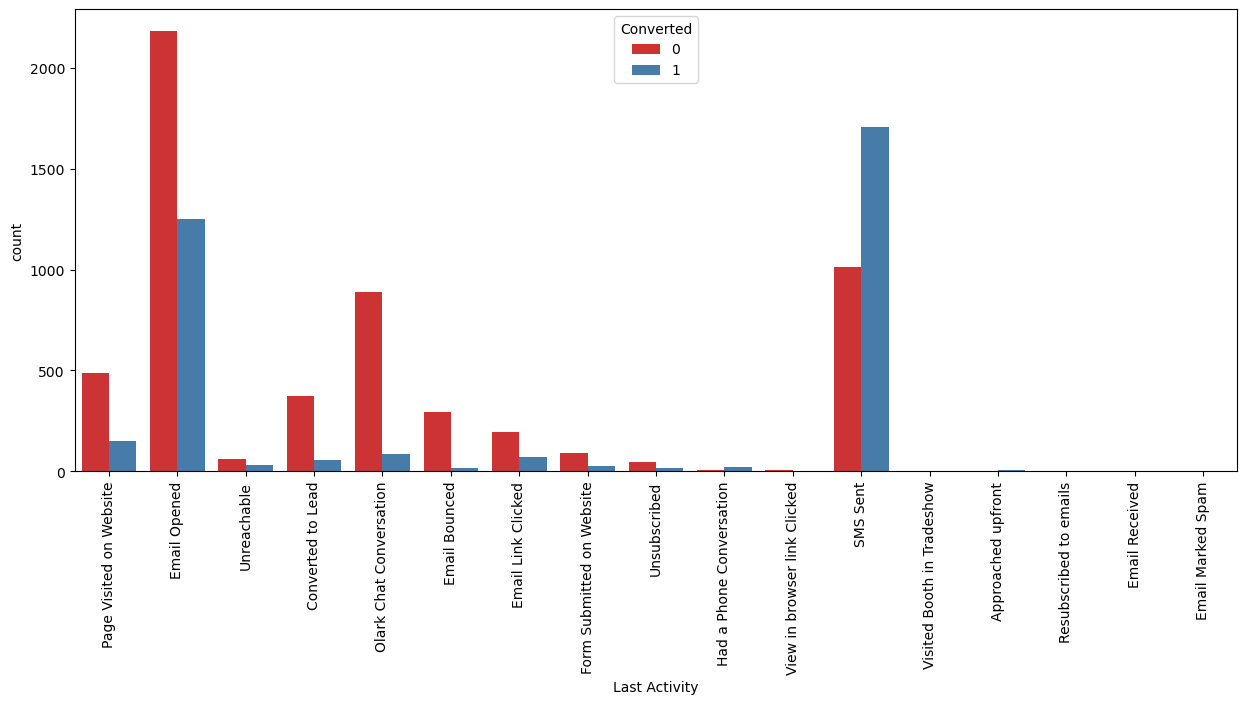

In [231]:
# 8- Last Activity independent variable

plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = Lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [232]:
# since there are so many categories having less values, we need to create anoter category named Others

Lead_data['Last Activity'] = Lead_data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked','Visited Booth in Tradeshow', 'Approached upfront', 'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Other'),
  Text(10, 0, 'SMS Sent')])

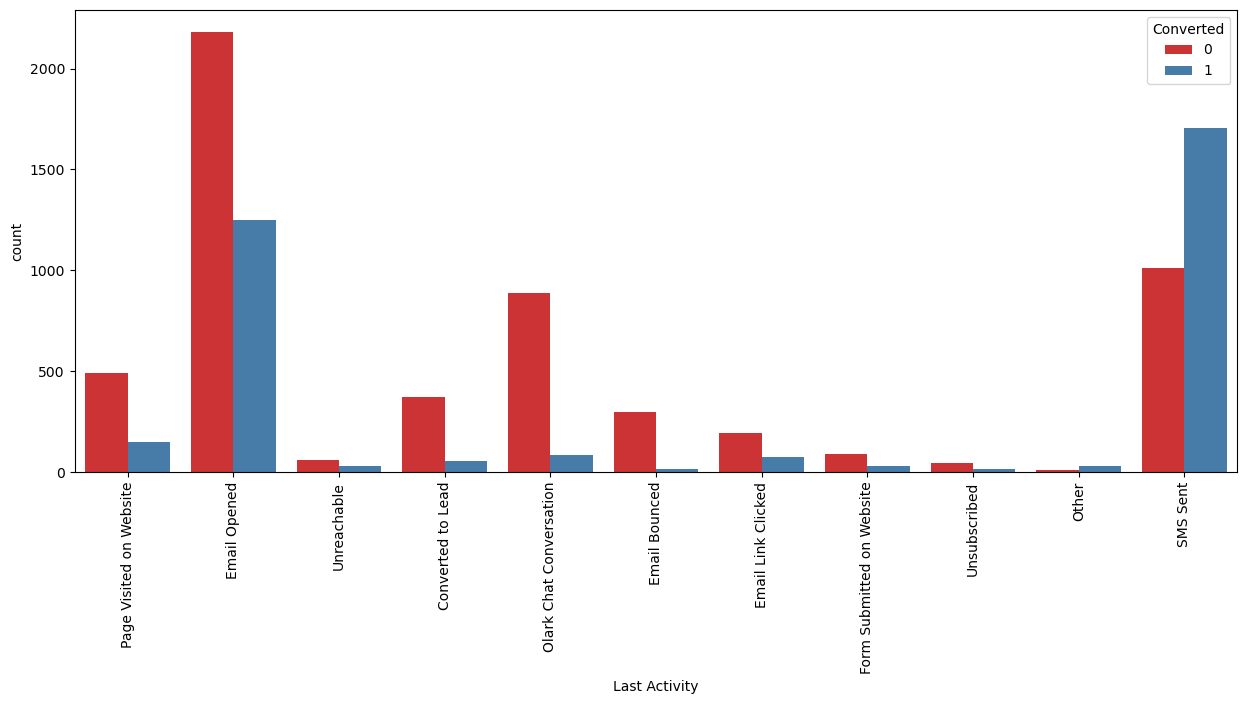

In [233]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = Lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [234]:
# now, from the above graph, we can infer that conversion rate for leads with last activity as SMS Sent is almost 60%.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'),
  Text(29, 0, 'unknown'),
  Text(30, 0

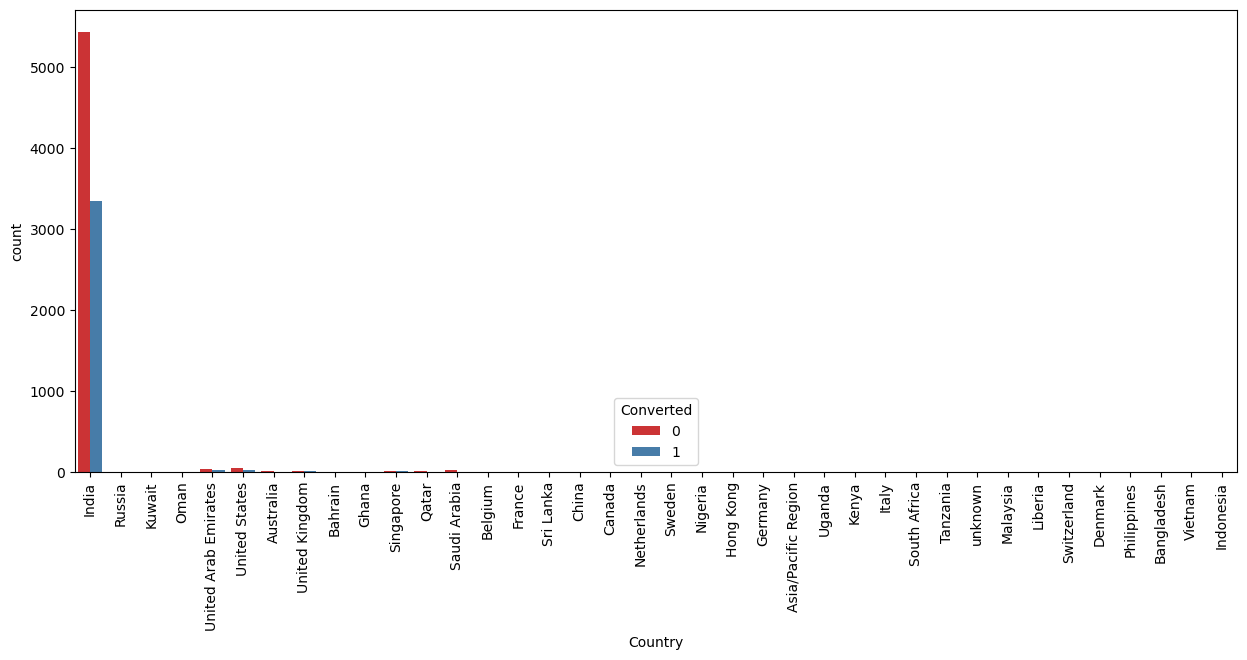

In [235]:
# 9- Country

plt.figure(figsize=(15,6))
sns.countplot(x = "Country", hue = "Converted", data = Lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [236]:
# since most values are India, no inference can be drawn

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Others'),
  Text(1, 0, 'Business Administration'),
  Text(2, 0, 'Media and Advertising'),
  Text(3, 0, 'Supply Chain Management'),
  Text(4, 0, 'IT Projects Management'),
  Text(5, 0, 'Finance Management'),
  Text(6, 0, 'Travel and Tourism'),
  Text(7, 0, 'Human Resource Management'),
  Text(8, 0, 'Marketing Management'),
  Text(9, 0, 'Banking, Investment And Insurance'),
  Text(10, 0, 'International Business'),
  Text(11, 0, 'E-COMMERCE'),
  Text(12, 0, 'Operations Management'),
  Text(13, 0, 'Retail Management'),
  Text(14, 0, 'Services Excellence'),
  Text(15, 0, 'Hospitality Management'),
  Text(16, 0, 'Rural and Agribusiness'),
  Text(17, 0, 'Healthcare Management'),
  Text(18, 0, 'E-Business')])

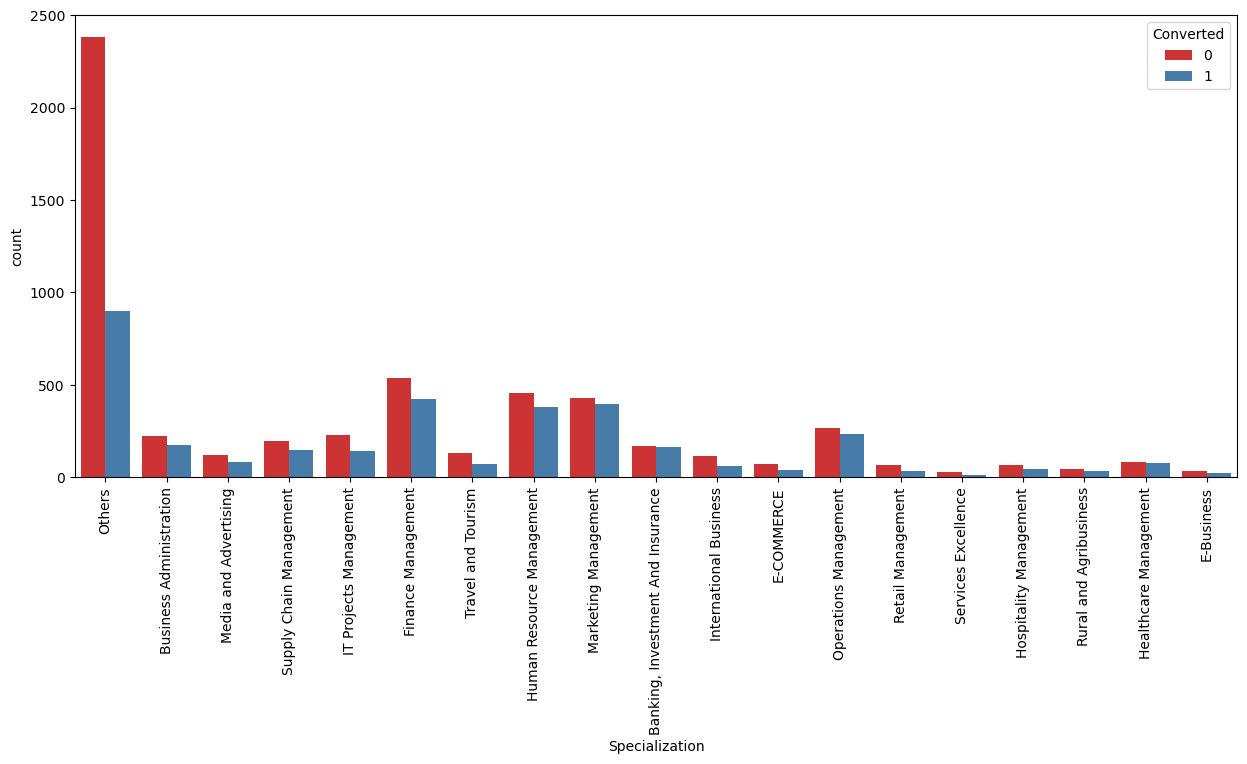

In [237]:
# 10- Specialization

plt.figure(figsize=(15,6))
sns.countplot(x = "Specialization", hue = "Converted", data = Lead_data,palette='Set1')
plt.xticks(rotation = 90)

(array([0]), [Text(0, 0, '0')])

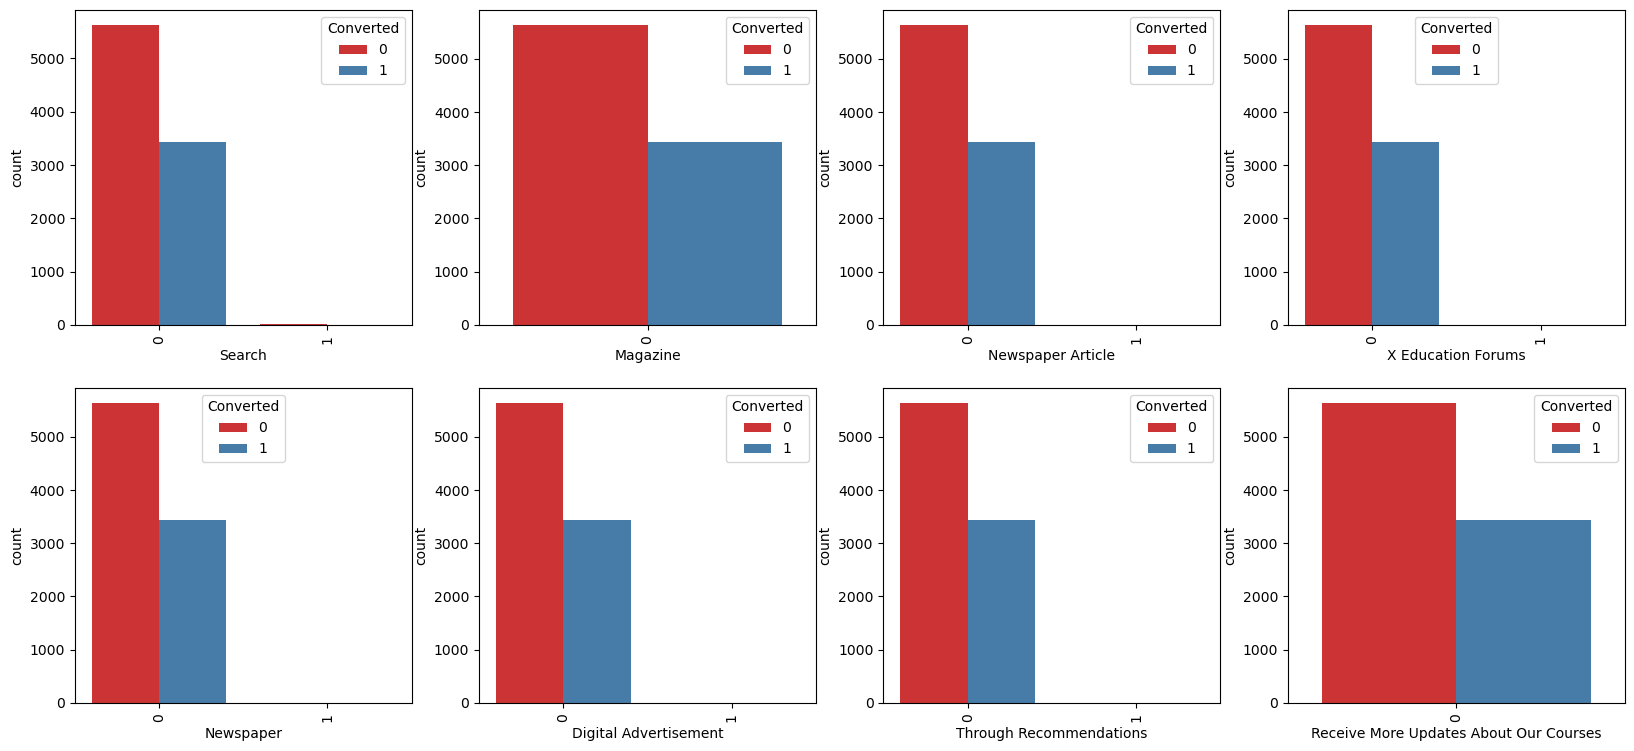

In [238]:
# 11- Search 
plt.figure(figsize=(20,9))
plt.subplot(2,4,1)
sns.countplot(x = "Search", hue = "Converted", data = Lead_data,palette='Set1')
plt.xticks(rotation = 90)

# 12- Magazine
plt.subplot(2,4,2)
sns.countplot(x = "Magazine", hue = "Converted", data = Lead_data,palette='Set1')
plt.xticks(rotation = 90)

# 13- Newspaper Article
plt.subplot(2,4,3)
sns.countplot(x = "Newspaper Article", hue = "Converted", data = Lead_data,palette='Set1')
plt.xticks(rotation = 90)

# 14- X Education Forums
plt.subplot(2,4,4)
sns.countplot(x = "X Education Forums", hue = "Converted", data = Lead_data,palette='Set1')
plt.xticks(rotation = 90)

# 15- Newspaper
plt.subplot(2,4,5)
sns.countplot(x = "Newspaper", hue = "Converted", data = Lead_data,palette='Set1')
plt.xticks(rotation = 90)

# 16- Digital Advertisement
plt.subplot(2,4,6)
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = Lead_data,palette='Set1')
plt.xticks(rotation = 90)

# 17- Through Recommendations
plt.subplot(2,4,7)
sns.countplot(x = "Through Recommendations", hue = "Converted", data = Lead_data,palette='Set1')
plt.xticks(rotation = 90)

# 18- Receive More Updates About Our Courses
plt.subplot(2,4,8)
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = Lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [239]:
# So, for all the variables above, most of te values are no, so no inference can be drawn from them

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'number not provided'),
  Text(12, 0, 'opp hangup'),
  Text(13, 0, 'Closed by Horizzon'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

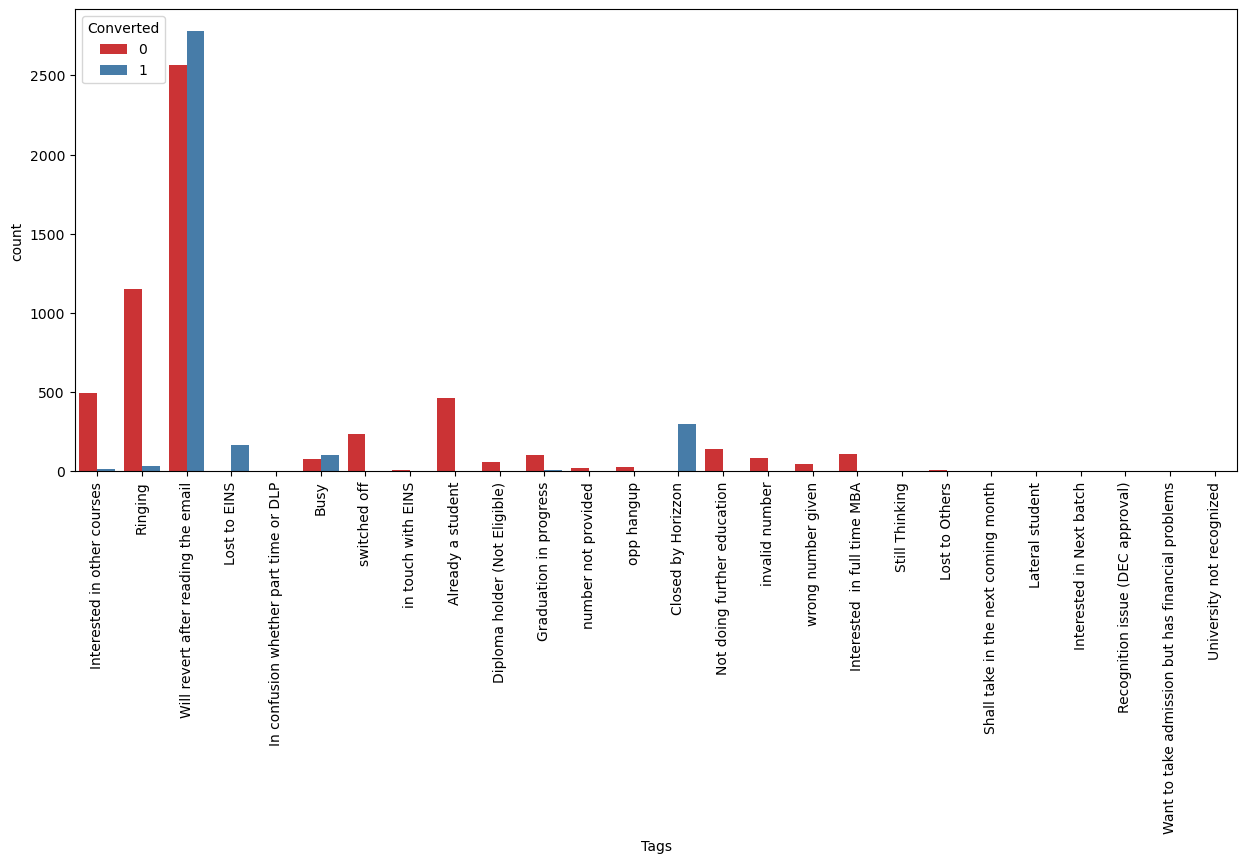

In [240]:
# 19- Tags

plt.figure(figsize=(15,6))
sns.countplot(x = "Tags", hue = "Converted", data = Lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [241]:
# Now, since this column is generated by the sales team for their analysis , so we need to remove this column.

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

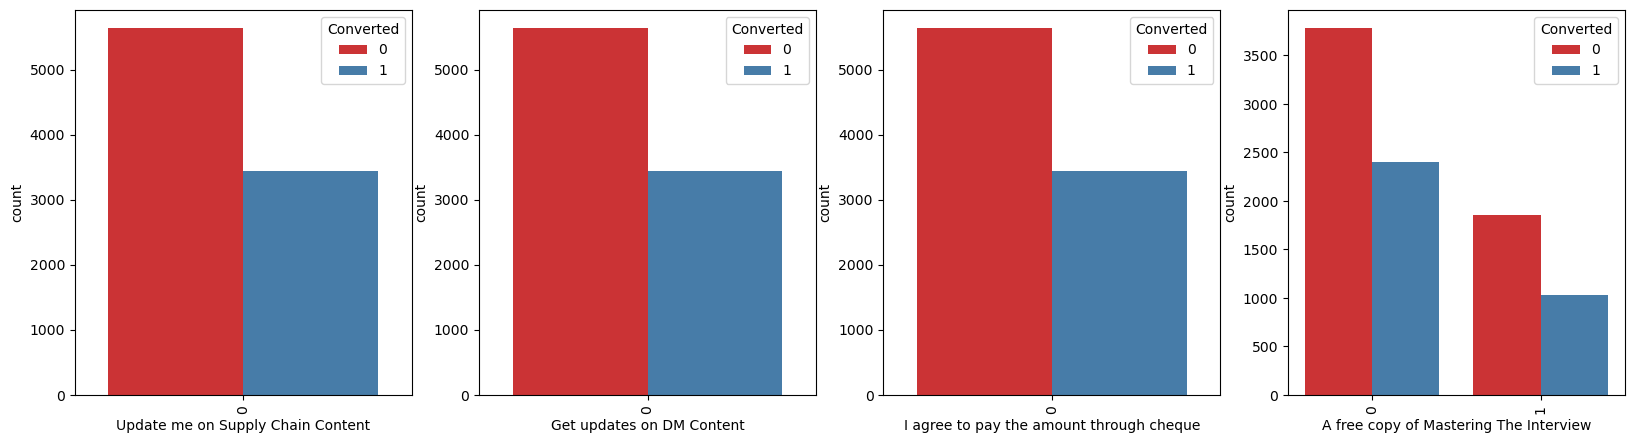

In [242]:
# 20- Update me on Supply Chain Content

plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = Lead_data,palette='Set1')
plt.xticks(rotation = 90)

# 21- Get updates on DM Content
plt.subplot(1,4,2)
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = Lead_data,palette='Set1')
plt.xticks(rotation = 90)

# 22- I agree to pay the amount through cheque
plt.subplot(1,4,3)
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = Lead_data,palette='Set1')
plt.xticks(rotation = 90)

# 23- A free copy of Mastering The Interview
plt.subplot(1,4,4)
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = Lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [243]:
# so for all these variables also, most of te values are no. therefore, no inference can be drawn from them.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

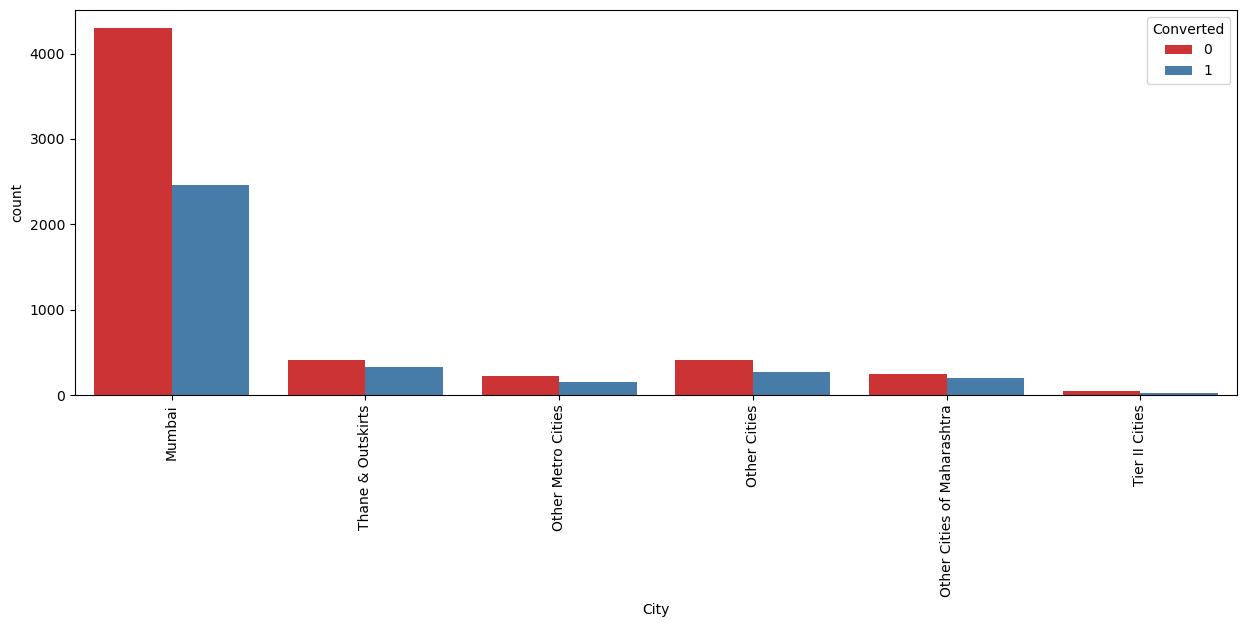

In [244]:
# 24- City

plt.figure(figsize=(15,5))
sns.countplot(x = "City", hue = "Converted", data = Lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [245]:
# here, we can infer that most of te values are from Mumbai with 50%

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Modified'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Page Visited on Website'),
  Text(3, 0, 'Email Bounced'),
  Text(4, 0, 'Email Link Clicked'),
  Text(5, 0, 'Unreachable'),
  Text(6, 0, 'Unsubscribed'),
  Text(7, 0, 'Had a Phone Conversation'),
  Text(8, 0, 'Olark Chat Conversation'),
  Text(9, 0, 'SMS Sent'),
  Text(10, 0, 'Approached upfront'),
  Text(11, 0, 'Resubscribed to emails'),
  Text(12, 0, 'View in browser link Clicked'),
  Text(13, 0, 'Form Submitted on Website'),
  Text(14, 0, 'Email Received'),
  Text(15, 0, 'Email Marked Spam')])

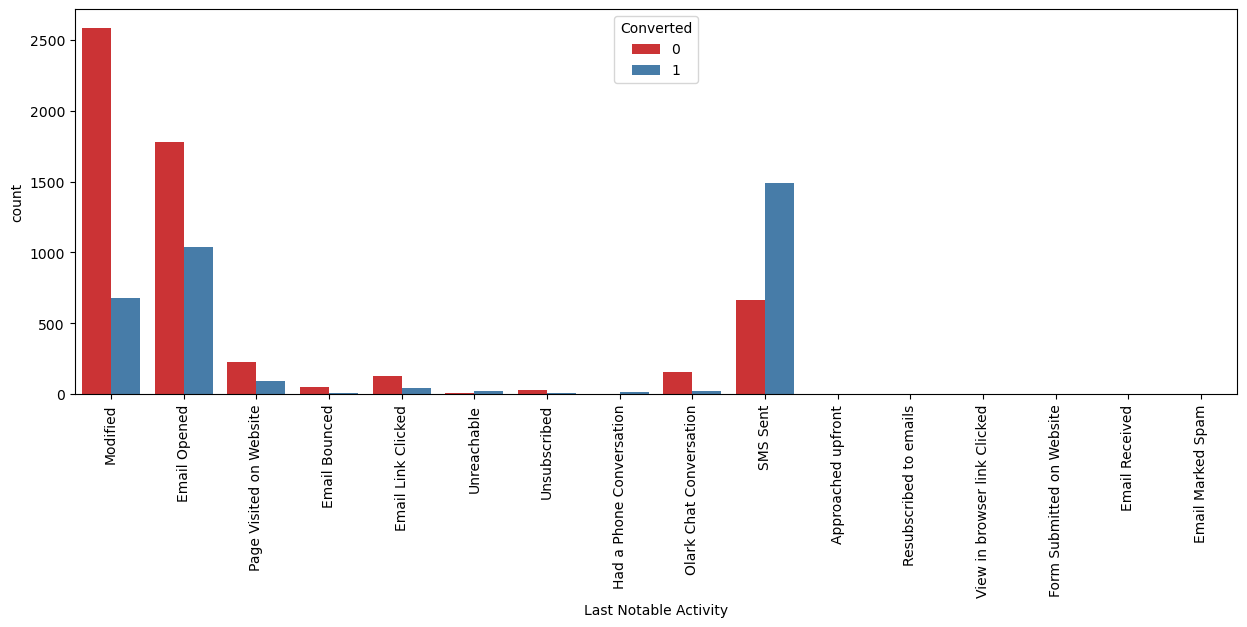

In [246]:
# 25- Last Notable Activity

plt.figure(figsize=(15,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = Lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [247]:
# So, based on te above analysis, we saw there are many variables from which no inference can be drawn, so we need to remove those

Lead_data = Lead_data.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],1)

C:\Users\sanje\AppData\Local\Temp\ipykernel_12056\4031538173.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  Lead_data = Lead_data.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',


In [248]:
Lead_data.shape

(9074, 18)

In [249]:
Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Prospect ID                                           9074 non-null   object 
 1   Lead Origin                                           9074 non-null   object 
 2   Lead Source                                           9074 non-null   object 
 3   Do Not Email                                          9074 non-null   int64  
 4   Do Not Call                                           9074 non-null   int64  
 5   Converted                                             9074 non-null   int64  
 6   TotalVisits                                           9074 non-null   float64
 7   Total Time Spent on Website                           9074 non-null   int64  
 8   Page Views Per Visit                                  9074

In [250]:
# Now,  we need to create dummy variables for te remaining categorical variables

dummies_v = pd.get_dummies(Lead_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','City','Last Notable Activity']], drop_first=True)
dummies_v.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [251]:
# now, concatenating the dummy dataframe with the main dataframe 
Lead_data = pd.concat([Lead_data, dummies_v], axis=1)
Lead_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [252]:
# Now, we need to drop the original variables for which dummies were created
Lead_data = Lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','City','Last Notable Activity'], axis = 1)

In [253]:
Lead_data.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Step 5: Splitting the data into train and test data

In [254]:
# Puttin feature variable to X
X = Lead_data.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [255]:
# now, we need to assign target variable to Y

y = Lead_data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100) #splitting the data

### Step 6: Scaling the features

In [257]:
scaler= StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [258]:
# checkin the conversion rate

Converted = (sum(Lead_data['Converted'])/len(Lead_data['Converted'].index))*100
Converted

37.85541106458012

### Model Building


In [259]:
# Logistic Regression Model 1
logml= sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())
res= logml.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6281
Model Family:                Binomial   Df Model:                           69
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2452.7
Date:                Mon, 17 Apr 2023   Deviance:                       4905.4
Time:                        17:41:05   Pearson chi2:                 6.12e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4292
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   19.4106   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Do Not Email                                            -1.5672      0.229     -6.853      0.000      -2.015      -1.119
Do Not Call                                             22.4728   5.14e+04      0.000      1.000   -1.01e+05    1.01e+05
TotalVisits                                              0.3147      0.058      5.419      0.000       0.201       0.429
Total Time Spent on Website                              1.1170      0.042     26.350      0.000       1.034       1.200
Page Views Per Visit                                    -0.3320      0.065     -5.117      0.000      -0.459      -0.205
What is your current occupation_Housewife               24.6984   2.55e+04      0.001      0.999      -5e+04    5.01e+04
What is your current occupation_Other                    1.8180      0.800      2.273      0.023       0.250       3.386
What is your current occupation_Student                  1.3275      0.241      5.499      0.000       0.854       1.801
What is your current occupation_Unemployed               1.1424      0.092     12.399      0.000       0.962       1.323
What is your current occupation_Working Professional     3.5525      0.210     16.886      0.000       3.140       3.965
Lead Origin_Landing Page Submission                     -0.8105      0.140     -5.770      0.000      -1.086      -0.535
Lead Origin_Lead Add Form                                0.5736      1.009      0.569      0.570      -1.403       2.551
Lead Origin_Lead Import                                 23.7267   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Facebook                                   -22.7503   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Google                                       0.3701      0.100      3.705      0.000       0.174       0.566
Lead Source_Olark Chat                                   1.4217      0.167      8.530      0.000       1.095       1.748
Lead Source_Organic Search                               0.1372      0.135      1.018      0.309      -0.127       0.401
Lead Source_Others                                       1.1473      0.656      1.750      0.080      -0.138       2.432
Lead Source_Reference                                    2.7502      1.033      2.663      0.008       0.726       4.775
Lead Source_Referral Sites                               0.0691      0.370      0.187      0.852      -0.656       0.794
Lead Source_Welingak Website                             5.1741      1.243      4.162      0.000       2.737       7.611
Last Activity_Email Bounced                             -0

### Feature Selection using RFE

In [260]:
from sklearn.linear_model import LogisticRegression

logreg= LogisticRegression()

In [261]:
from sklearn.feature_selection import RFE

rfe= RFE(logreg, n_features_to_select= 20)
rfe= rfe.fit(X_train, y_train)


C:\Users\sanje\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sanje\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\sanje\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sanje\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\sanje\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sanje\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [262]:
rfe.support_

array([ True, False, False,  True, False,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True, False, False,
        True, False,  True, False, False, False, False, False,  True,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
       False, False, False,  True, False, False])

In [263]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 9),
 ('TotalVisits', False, 20),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 19),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', True, 1),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 4),
 ('Lead Source_Facebook', False, 28),
 ('Lead Source_Google', False, 22),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 36),
 ('Lead Source_Others', False, 21),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 48),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 25),
 ('Last Activity_Email Link Clicked', False, 17),

In [264]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Other',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_Others',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [265]:
# assessing the model with StatsModels

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2513.7
Date:                Mon, 17 Apr 2023   Deviance:                       5027.4
Time:                        17:41:10   Pearson chi2:                 6.15e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4181
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1400      0.152     -7.494      0.000      -1.438      -0.842
Do Not Email                                            -1.6753      0.195     -8.611      0.000      -2.057      -1.294
Total Time Spent on Website                              1.1168      0.042     26.906      0.000       1.035       1.198
What is your current occupation_Housewife               23.6725   1.54e+04      0.002      0.999   -3.02e+04    3.03e+04
What is your current occupation_Other                    1.7956      0.763      2.354      0.019       0.301       3.291
What is your current occupation_Student                  1.2606      0.239      5.280      0.000       0.793       1.729
What is your current occupation_Unemployed               1.1312      0.090     12.548      0.000       0.954       1.308
What is your current occupation_Working Professional     3.5152      0.208     16.919      0.000       3.108       3.922
Lead Origin_Landing Page Submission                     -1.0189      0.129     -7.874      0.000      -1.273      -0.765
Lead Origin_Lead Add Form                                1.3919      0.922      1.510      0.131      -0.415       3.199
Lead Source_Olark Chat                                   1.1416      0.124      9.221      0.000       0.899       1.384
Lead Source_Reference                                    1.7931      0.945      1.898      0.058      -0.058       3.644
Lead Source_Welingak Website                             4.2212      1.171      3.604      0.000       1.926       6.517
Last Activity_Other                                      1.7730      0.544      3.260      0.001       0.707       2.839
Last Activity_SMS Sent                                   1.3333      0.077     17.303      0.000       1.182       1.484
Last Activity_Unsubscribed                               1.3823      0.486      2.842      0.004       0.429       2.336
Specialization_Others                                   -0.9673      0.127     -7.621      0.000      -1.216      -0.719
Last Notable Activity_Had a Phone Conversation           1.5310      1.248      1.227      0.220      -0.915       3.977
Last Notable Activity_Modified                          -0.9418      0.081    -11.625      0.000      -1.101      -0.783
Last Notable Activity_Olark Chat Conversation           -1.1699      0.337     -3.477      0.001      -1.829      -0.510
Last Notable Activity_Unreachable                        1.8213      0.495      3.682      0.000       0.852       2.791
========================================================================================================================
"""

In [266]:
# since p value of What is your current occupation_Housewife is very high, we need to drop it

col1 = col.drop('What is your current occupation_Housewife')

### Model 3

In [267]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2520.6
Date:                Mon, 17 Apr 2023   Deviance:                       5041.2
Time:                        17:41:10   Pearson chi2:                 6.19e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4168
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1033      0.151     -7.300      0.000      -1.400      -0.807
Do Not Email                                            -1.6782      0.195     -8.623      0.000      -2.060      -1.297
Total Time Spent on Website                              1.1157      0.041     26.931      0.000       1.034       1.197
What is your current occupation_Other                    1.7687      0.763      2.317      0.020       0.273       3.265
What is your current occupation_Student                  1.2351      0.239      5.174      0.000       0.767       1.703
What is your current occupation_Unemployed               1.1066      0.089     12.377      0.000       0.931       1.282
What is your current occupation_Working Professional     3.4878      0.207     16.811      0.000       3.081       3.894
Lead Origin_Landing Page Submission                     -1.0251      0.129     -7.935      0.000      -1.278      -0.772
Lead Origin_Lead Add Form                                1.3899      0.921      1.509      0.131      -0.416       3.196
Lead Source_Olark Chat                                   1.1374      0.124      9.196      0.000       0.895       1.380
Lead Source_Reference                                    1.8388      0.944      1.948      0.051      -0.012       3.689
Lead Source_Welingak Website                             4.2299      1.171      3.613      0.000       1.935       6.525
Last Activity_Other                                      1.7737      0.544      3.259      0.001       0.707       2.840
Last Activity_SMS Sent                                   1.3255      0.077     17.223      0.000       1.175       1.476
Last Activity_Unsubscribed                               1.3788      0.486      2.835      0.005       0.426       2.332
Specialization_Others                                   -0.9815      0.127     -7.743      0.000      -1.230      -0.733
Last Notable Activity_Had a Phone Conversation           1.5163      1.247      1.216      0.224      -0.928       3.961
Last Notable Activity_Modified                          -0.9475      0.081    -11.711      0.000      -1.106      -0.789
Last Notable Activity_Olark Chat Conversation           -1.1772      0.336     -3.500      0.000      -1.837      -0.518
Last Notable Activity_Unreachable                        1.8061      0.494      3.656      0.000       0.838       2.774
========================================================================================================================
"""

In [268]:
# now, Last Notable Activity_Had a Phone Conversation as a high p value, we need to drop it

col1 = col1.drop('Last Notable Activity_Had a Phone Conversation')

### Model 4

In [269]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2521.5
Date:                Mon, 17 Apr 2023   Deviance:                       5043.0
Time:                        17:41:10   Pearson chi2:                 6.19e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4167
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0968      0.151     -7.263      0.000      -1.393      -0.801
Do Not Email                                            -1.6812      0.195     -8.630      0.000      -2.063      -1.299
Total Time Spent on Website                              1.1145      0.041     26.916      0.000       1.033       1.196
What is your current occupation_Other                    1.7678      0.764      2.315      0.021       0.271       3.264
What is your current occupation_Student                  1.2327      0.239      5.163      0.000       0.765       1.701
What is your current occupation_Unemployed               1.1044      0.089     12.358      0.000       0.929       1.280
What is your current occupation_Working Professional     3.4818      0.207     16.791      0.000       3.075       3.888
Lead Origin_Landing Page Submission                     -1.0257      0.129     -7.943      0.000      -1.279      -0.773
Lead Origin_Lead Add Form                                1.3888      0.921      1.507      0.132      -0.417       3.195
Lead Source_Olark Chat                                   1.1350      0.124      9.177      0.000       0.893       1.377
Lead Source_Reference                                    1.8381      0.944      1.947      0.052      -0.012       3.689
Lead Source_Welingak Website                             4.2329      1.171      3.615      0.000       1.938       6.528
Last Activity_Other                                      2.1505      0.472      4.559      0.000       1.226       3.075
Last Activity_SMS Sent                                   1.3245      0.077     17.213      0.000       1.174       1.475
Last Activity_Unsubscribed                               1.3806      0.486      2.839      0.005       0.427       2.334
Specialization_Others                                   -0.9857      0.127     -7.776      0.000      -1.234      -0.737
Last Notable Activity_Modified                          -0.9535      0.081    -11.798      0.000      -1.112      -0.795
Last Notable Activity_Olark Chat Conversation           -1.1774      0.336     -3.500      0.000      -1.837      -0.518
Last Notable Activity_Unreachable                        1.8027      0.494      3.650      0.000       0.835       2.771
========================================================================================================================
"""

In [270]:
# we need to drop Lead Origin_Lead Add Form due to p values being high

col1 = col1.drop('Lead Origin_Lead Add Form')

### Model 5

In [271]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2522.7
Date:                Mon, 17 Apr 2023   Deviance:                       5045.5
Time:                        17:41:11   Pearson chi2:                 6.19e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4164
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0823      0.151     -7.182      0.000      -1.378      -0.787
Do Not Email                                            -1.6828      0.195     -8.637      0.000      -2.065      -1.301
Total Time Spent on Website                              1.1128      0.041     26.912      0.000       1.032       1.194
What is your current occupation_Other                    1.7656      0.764      2.311      0.021       0.268       3.263
What is your current occupation_Student                  1.2326      0.239      5.163      0.000       0.765       1.701
What is your current occupation_Unemployed               1.1069      0.089     12.391      0.000       0.932       1.282
What is your current occupation_Working Professional     3.4810      0.207     16.784      0.000       3.075       3.888
Lead Origin_Landing Page Submission                     -1.0411      0.129     -8.081      0.000      -1.294      -0.789
Lead Source_Olark Chat                                   1.1288      0.123      9.144      0.000       0.887       1.371
Lead Source_Reference                                    3.2136      0.243     13.239      0.000       2.738       3.689
Lead Source_Welingak Website                             5.6130      0.730      7.687      0.000       4.182       7.044
Last Activity_Other                                      2.1474      0.472      4.552      0.000       1.223       3.072
Last Activity_SMS Sent                                   1.3249      0.077     17.220      0.000       1.174       1.476
Last Activity_Unsubscribed                               1.3792      0.486      2.836      0.005       0.426       2.332
Specialization_Others                                   -0.9953      0.127     -7.860      0.000      -1.244      -0.747
Last Notable Activity_Modified                          -0.9545      0.081    -11.814      0.000      -1.113      -0.796
Last Notable Activity_Olark Chat Conversation           -1.1796      0.336     -3.507      0.000      -1.839      -0.520
Last Notable Activity_Unreachable                        1.7996      0.494      3.643      0.000       0.831       2.768
========================================================================================================================
"""

### Checking for VIF values

In [272]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# we need to create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,What is your current occupation_Unemployed,2.64
6,Lead Origin_Landing Page Submission,2.63
13,Specialization_Others,2.42
7,Lead Source_Olark Chat,1.93
14,Last Notable Activity_Modified,1.67
11,Last Activity_SMS Sent,1.60
8,Lead Source_Reference,1.35
5,What is your current occupation_Working Profes...,1.32
1,Total Time Spent on Website,1.32
0,Do Not Email,1.20


In [273]:
col1 = col1.drop('What is your current occupation_Unemployed') # drop it due to hig̱h VIF value

### Model 6

In [274]:
X_train_sm = sm.add_constant(X_train[col1])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2605.9
Date:                Mon, 17 Apr 2023   Deviance:                       5211.8
Time:                        17:41:11   Pearson chi2:                 6.48e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4010
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0994      0.126     -0.791      0.429      -0.346       0.147
Do Not Email                                            -1.6585      0.193     -8.610      0.000      -2.036      -1.281
Total Time Spent on Website                              1.1041      0.041     27.212      0.000       1.025       1.184
What is your current occupation_Other                    0.9294      0.770      1.207      0.228      -0.580       2.439
What is your current occupation_Student                  0.4322      0.233      1.857      0.063      -0.024       0.889
What is your current occupation_Working Professional     2.6331      0.196     13.426      0.000       2.249       3.017
Lead Origin_Landing Page Submission                     -1.1617      0.128     -9.106      0.000      -1.412      -0.912
Lead Source_Olark Chat                                   1.0126      0.121      8.401      0.000       0.776       1.249
Lead Source_Reference                                    3.3891      0.243     13.963      0.000       2.913       3.865
Lead Source_Welingak Website                             5.9389      0.730      8.130      0.000       4.507       7.371
Last Activity_Other                                      2.3207      0.466      4.977      0.000       1.407       3.235
Last Activity_SMS Sent                                   1.3752      0.075     18.222      0.000       1.227       1.523
Last Activity_Unsubscribed                               1.4100      0.486      2.904      0.004       0.458       2.362
Specialization_Others                                   -1.2008      0.125     -9.602      0.000      -1.446      -0.956
Last Notable Activity_Modified                          -1.0421      0.079    -13.157      0.000      -1.197      -0.887
Last Notable Activity_Olark Chat Conversation           -1.3441      0.329     -4.085      0.000      -1.989      -0.699
Last Notable Activity_Unreachable                        1.5685      0.474      3.307      0.001       0.639       2.498
========================================================================================================================
"""

In [275]:
col1 = col1.drop('What is your current occupation_Other') # high p value 

### Model 7

In [276]:
X_train_sm = sm.add_constant(X_train[col1])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2606.7
Date:                Mon, 17 Apr 2023   Deviance:                       5213.4
Time:                        17:41:11   Pearson chi2:                 6.48e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4008
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0908      0.126     -0.723      0.469      -0.337       0.155
Do Not Email                                            -1.6539      0.193     -8.588      0.000      -2.031      -1.276
Total Time Spent on Website                              1.1055      0.041     27.248      0.000       1.026       1.185
What is your current occupation_Student                  0.4298      0.233      1.846      0.065      -0.027       0.886
What is your current occupation_Working Professional     2.6301      0.196     13.409      0.000       2.246       3.015
Lead Origin_Landing Page Submission                     -1.1683      0.127     -9.171      0.000      -1.418      -0.919
Lead Source_Olark Chat                                   1.0134      0.121      8.408      0.000       0.777       1.250
Lead Source_Reference                                    3.3858      0.243     13.952      0.000       2.910       3.861
Lead Source_Welingak Website                             5.9384      0.730      8.130      0.000       4.507       7.370
Last Activity_Other                                      2.3178      0.466      4.969      0.000       1.404       3.232
Last Activity_SMS Sent                                   1.3729      0.075     18.200      0.000       1.225       1.521
Last Activity_Unsubscribed                               1.4025      0.486      2.888      0.004       0.451       2.354
Specialization_Others                                   -1.2085      0.125     -9.678      0.000      -1.453      -0.964
Last Notable Activity_Modified                          -1.0407      0.079    -13.145      0.000      -1.196      -0.885
Last Notable Activity_Olark Chat Conversation           -1.3465      0.329     -4.091      0.000      -1.992      -0.701
Last Notable Activity_Unreachable                        1.5662      0.474      3.302      0.001       0.637       2.496
========================================================================================================================
"""

In [277]:
col1 = col1.drop('What is your current occupation_Student') # high p value

### Model 8

In [278]:
X_train_sm = sm.add_constant(X_train[col1])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2608.3
Date:                Mon, 17 Apr 2023   Deviance:                       5216.7
Time:                        17:41:11   Pearson chi2:                 6.49e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4005
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0792      0.125     -0.631      0.528      -0.325       0.167
Do Not Email                                            -1.6530      0.193     -8.578      0.000      -2.031      -1.275
Total Time Spent on Website                              1.1053      0.041     27.250      0.000       1.026       1.185
What is your current occupation_Working Professional     2.6193      0.196     13.362      0.000       2.235       3.003
Lead Origin_Landing Page Submission                     -1.1651      0.127     -9.143      0.000      -1.415      -0.915
Lead Source_Olark Chat                                   1.0192      0.121      8.457      0.000       0.783       1.255
Lead Source_Reference                                    3.3906      0.242     13.983      0.000       2.915       3.866
Lead Source_Welingak Website                             5.9337      0.730      8.124      0.000       4.502       7.365
Last Activity_Other                                      2.3074      0.467      4.946      0.000       1.393       3.222
Last Activity_SMS Sent                                   1.3647      0.075     18.144      0.000       1.217       1.512
Last Activity_Unsubscribed                               1.3889      0.486      2.860      0.004       0.437       2.341
Specialization_Others                                   -1.2103      0.125     -9.683      0.000      -1.455      -0.965
Last Notable Activity_Modified                          -1.0451      0.079    -13.206      0.000      -1.200      -0.890
Last Notable Activity_Olark Chat Conversation           -1.3367      0.329     -4.069      0.000      -1.981      -0.693
Last Notable Activity_Unreachable                        1.5527      0.474      3.274      0.001       0.623       2.482
========================================================================================================================
"""

In [279]:
# checking VIF values

from statsmodels.stats.outliers_influence import variance_inflation_factor


# we need to create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Specialization_Others,2.16
4,Lead Source_Olark Chat,1.91
3,Lead Origin_Landing Page Submission,1.72
11,Last Notable Activity_Modified,1.66
8,Last Activity_SMS Sent,1.55
1,Total Time Spent on Website,1.30
5,Lead Source_Reference,1.24
0,Do Not Email,1.20
2,What is your current occupation_Working Profes...,1.19
6,Lead Source_Welingak Website,1.09


In [280]:
col1= col1.drop('Last Activity_Unsubscribed') #high p value

### Model 9

In [281]:
X_train_sm = sm.add_constant(X_train[col1])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2612.0
Date:                Mon, 17 Apr 2023   Deviance:                       5223.9
Time:                        17:41:11   Pearson chi2:                 6.49e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3998
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0689      0.125     -0.550      0.582      -0.315       0.177
Do Not Email                                            -1.4901      0.178     -8.360      0.000      -1.839      -1.141
Total Time Spent on Website                              1.1066      0.041     27.293      0.000       1.027       1.186
What is your current occupation_Working Professional     2.6201      0.195     13.407      0.000       2.237       3.003
Lead Origin_Landing Page Submission                     -1.1681      0.127     -9.165      0.000      -1.418      -0.918
Lead Source_Olark Chat                                   1.0200      0.120      8.467      0.000       0.784       1.256
Lead Source_Reference                                    3.3797      0.242     13.959      0.000       2.905       3.854
Lead Source_Welingak Website                             5.9007      0.729      8.091      0.000       4.471       7.330
Last Activity_Other                                      2.2965      0.467      4.921      0.000       1.382       3.211
Last Activity_SMS Sent                                   1.3488      0.075     18.013      0.000       1.202       1.496
Specialization_Others                                   -1.2111      0.125     -9.694      0.000      -1.456      -0.966
Last Notable Activity_Modified                          -1.0532      0.079    -13.321      0.000      -1.208      -0.898
Last Notable Activity_Olark Chat Conversation           -1.3499      0.328     -4.111      0.000      -1.994      -0.706
Last Notable Activity_Unreachable                        1.5415      0.473      3.256      0.001       0.613       2.470
========================================================================================================================
"""

In [282]:
col1 = col1.drop('Last Notable Activity_Unreachable') #high p value

### Model 10

In [283]:
X_train_sm = sm.add_constant(X_train[col1])
logm10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2617.4
Date:                Mon, 17 Apr 2023   Deviance:                       5234.8
Time:                        17:41:11   Pearson chi2:                 6.48e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3988
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0448      0.125     -0.359      0.720      -0.290       0.200
Do Not Email                                            -1.4926      0.178     -8.375      0.000      -1.842      -1.143
Total Time Spent on Website                              1.1033      0.040     27.268      0.000       1.024       1.183
What is your current occupation_Working Professional     2.6212      0.195     13.428      0.000       2.239       3.004
Lead Origin_Landing Page Submission                     -1.1725      0.127     -9.210      0.000      -1.422      -0.923
Lead Source_Olark Chat                                   1.0095      0.120      8.396      0.000       0.774       1.245
Lead Source_Reference                                    3.3682      0.242     13.920      0.000       2.894       3.842
Lead Source_Welingak Website                             5.8887      0.729      8.075      0.000       4.459       7.318
Last Activity_Other                                      2.2854      0.467      4.896      0.000       1.371       3.200
Last Activity_SMS Sent                                   1.3335      0.075     17.862      0.000       1.187       1.480
Specialization_Others                                   -1.2144      0.125     -9.729      0.000      -1.459      -0.970
Last Notable Activity_Modified                          -1.0662      0.079    -13.513      0.000      -1.221      -0.912
Last Notable Activity_Olark Chat Conversation           -1.3637      0.328     -4.155      0.000      -2.007      -0.720
========================================================================================================================
"""

In [284]:
# Now, Since the p values of all variables is 0 and VIF values are low for all the variables, model-10 is our final model. We have 12 variables in our final model.

### Making Prediction on the Train set

In [285]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.198743
1012    0.130221
9226    0.276309
4750    0.873155
7987    0.781755
1281    0.755385
2880    0.100679
4971    0.967363
7536    0.858900
1248    0.750225
dtype: float64

In [286]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.1987427 , 0.13022131, 0.27630881, 0.87315528, 0.78175536,
       0.75538506, 0.10067873, 0.96736288, 0.85890025, 0.75022534])

### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [287]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.198743,3009
1,0,0.130221,1012
2,0,0.276309,9226
3,1,0.873155,4750
4,1,0.781755,7987


### Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels
####   Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [288]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.198743,3009,0
1,0,0.130221,1012,0
2,0,0.276309,9226,0
3,1,0.873155,4750,1
4,1,0.781755,7987,1


### Making the Confusion matrix

In [289]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3467  438]
 [ 740 1706]]


In [290]:
# The confusion matrix indicates as below
# Predicted     not_converted    converted
# Actual
# not_converted        3467      438
# converted            740        1706  

In [291]:
# Now, we need to check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8145173988348292


### Metrics beyond simply accuracy

In [292]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [293]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.6974652493867539


In [294]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8878361075544174


In [295]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.11216389244558259


In [296]:
# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7957089552238806


In [297]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.8241026859995246


In [298]:
# We found out that specificity was good (~88%) but our sensitivity was only 69%. Hence, this needs to be taken care of.
# We got sensitivity of 69% because of the cut-off point of 0.5 that we had arbitrarily chosen. 
# Now, this cut-off point need to be optimised in order to get a decent value of sensitivity and 
# for this we will use the ROC curve.

### Plotting the ROC Curve

In [299]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [300]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

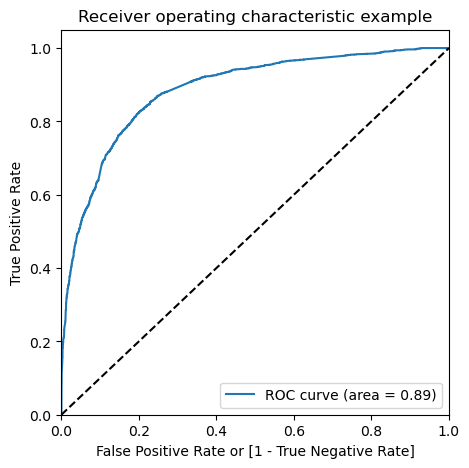

In [301]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [302]:
# Since we have higher (0.89) area under the ROC curve , therefore our model is a good one.

In [303]:
# Finding Optimal Cutoff Point
# Before, we had chosen an arbitrary cut-off value of 0.5. 
# Now, We need to determine the best cut-off value. Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [304]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.198743,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.130221,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.276309,9226,0,1,1,1,0,0,0,0,0,0,0
3,1,0.873155,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.781755,7987,1,1,1,1,1,1,1,1,1,0,0


In [305]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.609825  0.967294  0.385915
0.2   0.2  0.747914  0.916190  0.642510
0.3   0.3  0.802708  0.845462  0.775928
0.4   0.4  0.815462  0.772690  0.842254
0.5   0.5  0.814517  0.697465  0.887836
0.6   0.6  0.797670  0.601390  0.920615
0.7   0.7  0.787907  0.533933  0.946991
0.8   0.8  0.759723  0.421096  0.971831
0.9   0.9  0.723036  0.299673  0.988220


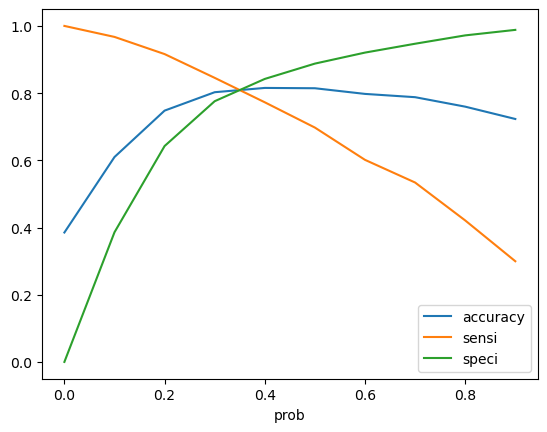

In [306]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [307]:
# From the curve above, 0.34 is the optimum point to take it as a cutoff probability.

In [308]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.198743,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.130221,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.276309,9226,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.873155,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.781755,7987,1,1,1,1,1,1,1,1,1,0,0,1


### Assigning Lead Score to the Training data

In [309]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.198743,3009,0,1,1,0,0,0,0,0,0,0,0,0,20
1,0,0.130221,1012,0,1,1,0,0,0,0,0,0,0,0,0,13
2,0,0.276309,9226,0,1,1,1,0,0,0,0,0,0,0,0,28
3,1,0.873155,4750,1,1,1,1,1,1,1,1,1,1,0,1,87
4,1,0.781755,7987,1,1,1,1,1,1,1,1,1,0,0,1,78


### Model Evaluation

In [310]:
# Now, we need to check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.810266099826799


In [311]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3149,  756],
       [ 449, 1997]], dtype=int64)

In [312]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [313]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8164349959116926


In [314]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8064020486555697


In [315]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.19359795134443022


In [316]:
# Positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7253904831093353


In [317]:
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8752084491384102


### Precision and Recall

#### Precision = Also known as Positive Predictive Value, it refers to the percentage of the results which are relevant.
#### Recall = Also known as Sensitivity , it refers to the percentage of total relevant results correctly classified by the algorithm.

In [318]:
# Precision
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7957089552238806


In [319]:
# Recall
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.6974652493867539


#### Precision and recall tradeoff

In [320]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [321]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

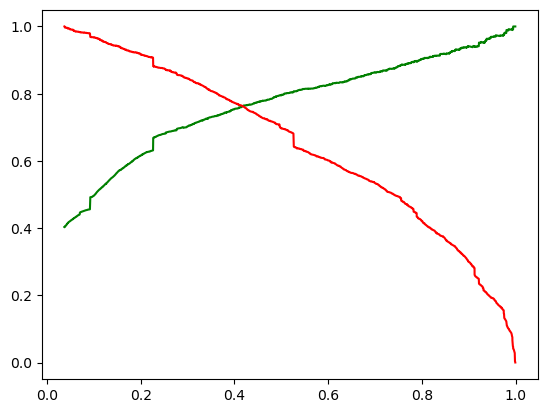

In [322]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [323]:

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [324]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,What is your current occupation_Working Professional,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Other,Last Activity_SMS Sent,Specialization_Others,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
3271,0,-0.600595,0,0,0,0,0,0,0,1,0,0
1490,0,1.887326,1,1,0,0,0,0,0,0,0,0
7936,0,-0.752879,0,0,0,0,0,0,0,1,0,0
4216,0,-0.888650,0,0,0,1,0,0,0,0,1,0
3830,0,-0.587751,0,1,0,0,0,0,0,0,0,0


In [325]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.127654
1490    0.970290
7936    0.110085
4216    0.781890
3830    0.134026
1800    0.640437
6507    0.353612
4821    0.306346
4223    0.921432
4714    0.276309
dtype: float64

In [327]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3271,0.127654
1490,0.970290
7936,0.110085
4216,0.781890
3830,0.134026


In [328]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [329]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [330]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [332]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.127654
1,1,1490,0.970290
2,0,7936,0.110085
3,1,4216,0.781890
4,0,3830,0.134026


In [333]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [335]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.127654
1,1490,1,0.970290
2,7936,0,0.110085
3,4216,1,0.781890
4,3830,0,0.134026


In [336]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.127654,0
1,1490,1,0.970290,1
2,7936,0,0.110085,0
3,4216,1,0.781890,1
4,3830,0,0.134026,0


In [337]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.8049944913698127


In [338]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1395,  339],
       [ 192,  797]], dtype=int64)

In [339]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [340]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.8058645096056622


In [341]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8044982698961938


In [342]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3271,0,0.127654,0,13
1,1490,1,0.970290,1,97
2,7936,0,0.110085,0,11
3,4216,1,0.781890,1,78
4,3830,0,0.134026,0,13


#### Observations:
####   After running the model on the Test Data , we obtain:

#### Accuracy : 80.4 %
#### Sensitivity : 80.5 %
#### Specificity : 80.4 %

## Results :
### 1) Comparing the values obtained for Train & Test:
#### Train Data:
#### Accuracy : 81.0 %
#### Sensitivity : 81.6 %
#### Specificity : 80.6 %

#### Test Data:
#### Accuracy : 80.4 %
#### Sensitivity : 80.5 %
#### Specificity : 80.4 %

#### Thus we have achieved our goal of getting a ballpark of the target lead conversion rate to be around 80% . The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model to get a higher lead conversion rate of 80%.

### 2) Finding out the leads which should be contacted:
#### The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 85. They can be termed as 'Hot Leads'.

In [343]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
1,1490,1,0.970290,1,97
8,4223,1,0.921432,1,92
16,1946,1,0.921686,1,92
21,2461,1,0.993190,1,99
23,5822,1,0.998163,1,100
...,...,...,...,...,...
2694,1566,1,0.949575,1,95
2699,6461,1,0.963231,1,96
2703,5741,1,0.913910,1,91
2715,6299,1,0.875671,1,88


In [344]:
# So there are 373 leads which can be contacted and have a high chance of getting converted. The Prospect ID of the customers to be contacted are :

print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([1490, 4223, 1946, 2461, 5822, 2684, 2010, 4062, 7696, 9049, 1518,
       4543, 4830, 4365, 3542, 2504, 7674, 8596, 4003, 4963, 6947, 4807,
        446, 8372, 5805, 3758,  337, 1561, 5367,  737, 9034, 6423, 8286,
       7174, 4461, 1436, 7552, 3932, 4080, 1475, 5785, 2860, 7253, 4297,
       5490, 1995, 4498, 5797, 8687,  831, 7653, 2018, 6743, 3307, 3976,
       5769, 1051, 1663, 3288, 8959, 7521, 8282, 8213, 9063, 5292, 6913,
       1481,  785, 3265, 3285, 7433, 3858, 3810, 2009, 8106,  373, 7417,
       4179, 8568, 7268, 6784, 6754, 7236, 2960, 7753, 3983,  802, 8745,
       4717,  505, 8509, 6094, 4992, 7036, 2680, 7065,  112, 6149, 7157,
       3827, 7175, 1675, 6999, 5826, 8492, 6499, 2481, 3439, 4612, 7129,
       4793, 4837, 2495,  822, 2378, 5090, 5075, 7699, 5638, 2342, 8077,
       2727,  720, 7489, 2961, 1542, 5656, 2630, 6728, 8205, 7060, 6332,
       8461, 2427, 5087,  174, 2674, 8065, 2095, 1568, 8597, 4865, 3535,
       4708, 1304, 6066, 6538, 5700, 1388, 5815, 79

### 3) Finding out the Important Features from our final model:

In [345]:
res.params.sort_values(ascending=False)

Lead Source_Welingak Website                            5.888721
Lead Source_Reference                                   3.368164
What is your current occupation_Working Professional    2.621221
Last Activity_Other                                     2.285367
Last Activity_SMS Sent                                  1.333472
Total Time Spent on Website                             1.103290
Lead Source_Olark Chat                                  1.009523
const                                                  -0.044835
Last Notable Activity_Modified                         -1.066174
Lead Origin_Landing Page Submission                    -1.172529
Specialization_Others                                  -1.214393
Last Notable Activity_Olark Chat Conversation          -1.363729
Do Not Email                                           -1.492639
dtype: float64